In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     --------------------- ------------------ 4.5/8.4 MB 95.4 MB/s eta 0:00:01
     ---------------------------------------  8.4/8.4 MB 107.1 MB/s eta 0:00:01
     ---------------------------------------- 8.4/8.4 MB 66.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/298.0 kB ? eta -:--:--
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [4]:
# insert your own path to bank data
df = pd.read_csv("data/bank/bank.csv", sep = ";", encoding= "utf-8")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [8]:
df.describe(exclude=[np.number])  

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [9]:
df.poutcome.describe()

count        4521
unique          4
top       unknown
freq         3705
Name: poutcome, dtype: object

In [10]:
sum(df.poutcome=='unknown')

3705

In [11]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [12]:
df[df.poutcome=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [13]:
df[(df.poutcome=='unknown') & (df.balance > 500)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4509,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no
4510,36,technician,divorced,secondary,no,566,yes,no,unknown,20,may,129,2,-1,0,unknown,no
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes


In [14]:
df.y.describe()
df.y.dtype

dtype('O')

In [15]:
df[(df.poutcome=='unknown') & (df.y == 'no')].shape

(3368, 17)

In [16]:
df.shape

(4521, 17)

In [17]:
df.y.value_counts()


no     4000
yes     521
Name: y, dtype: int64

In [18]:
# normalize over all values.
pd.crosstab(df.y, "freq", normalize=True)

col_0,freq
y,
no,0.88476
yes,0.11524


<Axes: xlabel='y'>

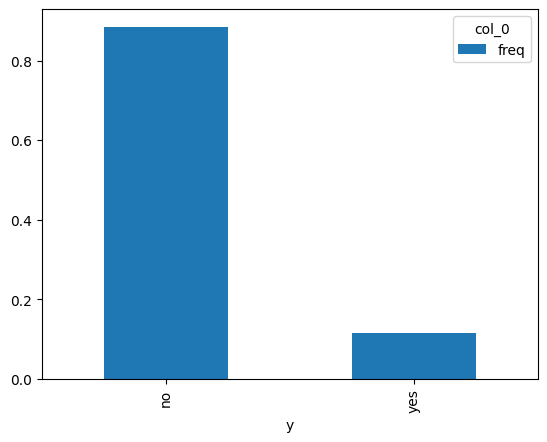

In [19]:
t = pd.crosstab(df.y, "freq", normalize=True)
t.plot.bar()

<Axes: xlabel='y'>

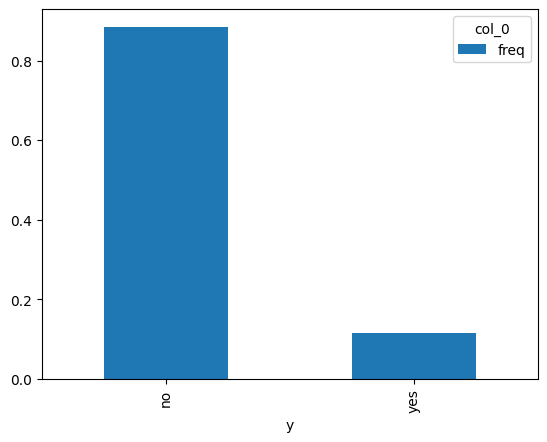

In [20]:
t.plot(kind = "bar")

<Axes: xlabel='y'>

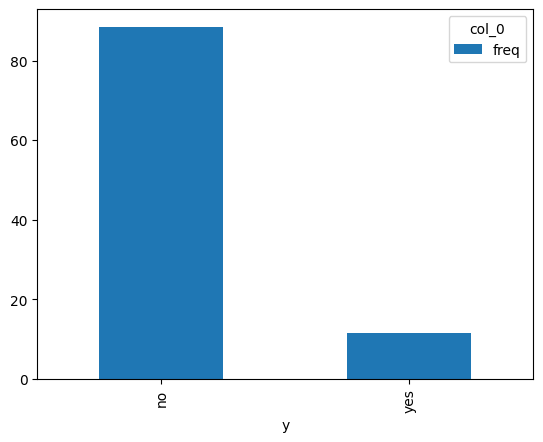

In [21]:
(t * 100).plot(kind = "bar")

array([<Axes: ylabel='freq'>], dtype=object)

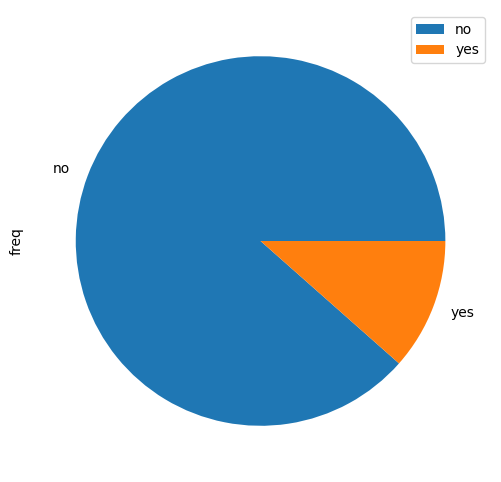

In [22]:
t.plot.pie(subplots=True, figsize = (6, 6))

In [23]:
df.corr() # meaningless in our case

C:\Users\dsti0\AppData\Local\Temp\ipykernel_17220\412147615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # meaningless in our case


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [24]:
df.balance.cov(df.age)

2668.042729455266

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='day', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>,
        <Axes: xlabel='pdays', ylabel='age'>,
        <Axes: xlabel='previous', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='balance'>,
        <Axes: xlabel='balance', ylabel='balance'>,
        <Axes: xlabel='day', ylabel='balance'>,
        <Axes: xlabel='duration', ylabel='balance'>,
        <Axes: xlabel='campaign', ylabel='balance'>,
        <Axes: xlabel='pdays', ylabel='balance'>,
        <Axes: xlabel='previous', ylabel='balance'>],
       [<Axes: xlabel='age', ylabel='day'>,
        <Axes: xlabel='balance', ylabel='day'>,
        <Axes: xlabel='day', ylabel='day'>,
        <Axes: xlabel='duration', ylabel='day'>,
        <Axes: xlabel='campaign', ylabel='day'>,
        <Axes: xlabel='pdays', ylabel='day'>,
        <Axes: xlabel='previous'

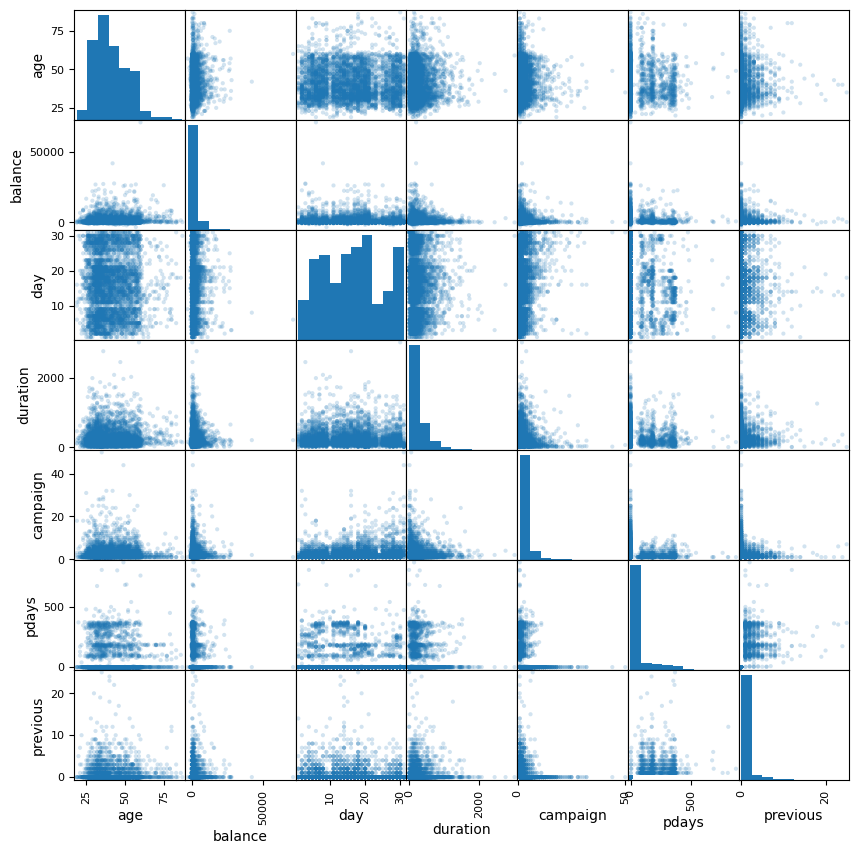

In [25]:
# Visualise covariates two by two
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='day', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>,
        <Axes: xlabel='pdays', ylabel='age'>,
        <Axes: xlabel='previous', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='balance'>,
        <Axes: xlabel='balance', ylabel='balance'>,
        <Axes: xlabel='day', ylabel='balance'>,
        <Axes: xlabel='duration', ylabel='balance'>,
        <Axes: xlabel='campaign', ylabel='balance'>,
        <Axes: xlabel='pdays', ylabel='balance'>,
        <Axes: xlabel='previous', ylabel='balance'>],
       [<Axes: xlabel='age', ylabel='day'>,
        <Axes: xlabel='balance', ylabel='day'>,
        <Axes: xlabel='day', ylabel='day'>,
        <Axes: xlabel='duration', ylabel='day'>,
        <Axes: xlabel='campaign', ylabel='day'>,
        <Axes: xlabel='pdays', ylabel='day'>,
        <Axes: xlabel='previous'

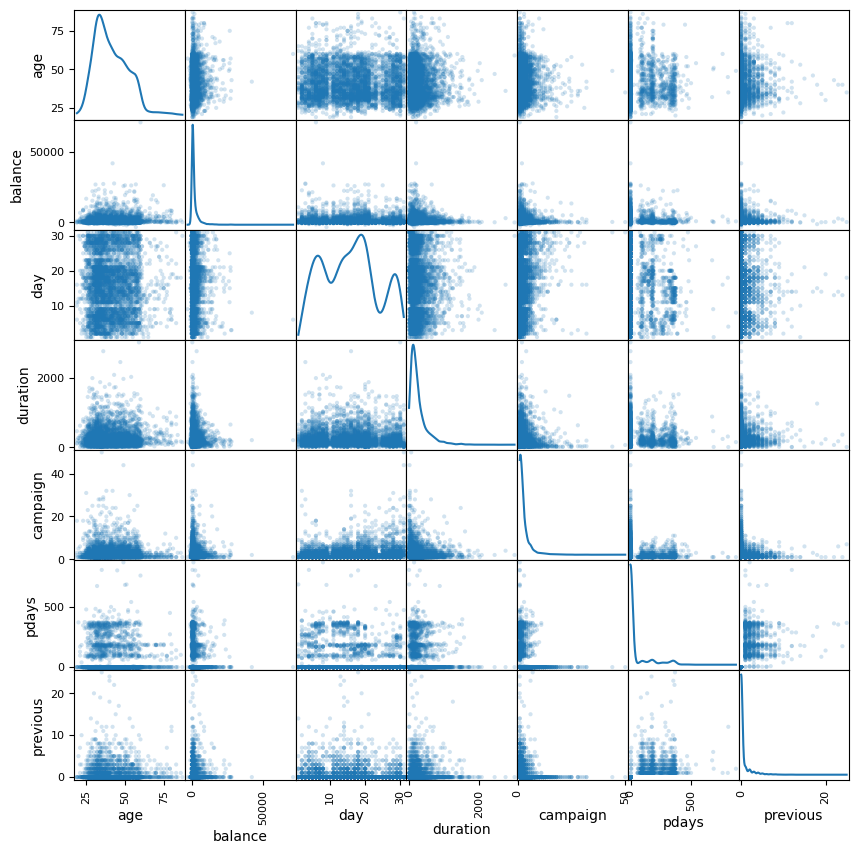

In [26]:
# If you are familiar with PDE, you can estimate each variable distribution with 'kde' method
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')


In [27]:
# Compare qualitative variables
pd.crosstab(df.education, df.y)


y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [28]:
# margins will add subtotals
pd.crosstab(df.education, df.y, margins = True)

y,no,yes,All
education,,,
primary,614,64,678
secondary,2061,245,2306
tertiary,1157,193,1350
unknown,168,19,187
All,4000,521,4521


In [29]:
# Normalize margin values
pd.crosstab(df.education, df.y, margins = True, normalize = True)

y,no,yes,All
education,,,
primary,0.135811,0.014156,0.149967
secondary,0.455873,0.054192,0.510064
tertiary,0.255917,0.042690,0.298607
unknown,0.037160,0.004203,0.041363
All,0.884760,0.115240,1.000000


In [30]:
# normalize over each row
pd.crosstab(df.education, df.y, margins = True, normalize = 'index')

y,no,yes
education,,
primary,0.905605,0.094395
secondary,0.893755,0.106245
tertiary,0.857037,0.142963
unknown,0.898396,0.101604
All,0.884760,0.115240


In [31]:
# normalize over each column
pd.crosstab(df.education, df.y, margins = True, normalize = 'columns')

y,no,yes,All
education,,,
primary,0.15350,0.122841,0.149967
secondary,0.51525,0.470250,0.510064
tertiary,0.28925,0.370441,0.298607
unknown,0.04200,0.036468,0.041363


<Axes: xlabel='education'>

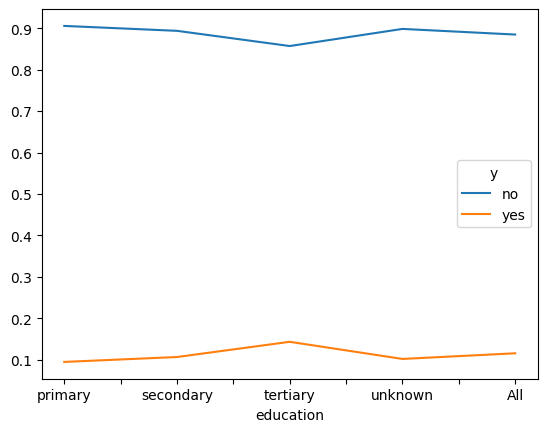

In [32]:
t_ = pd.crosstab(df.education, df.y, margins=True, normalize = 'index')
t_.plot()

<Axes: xlabel='education'>

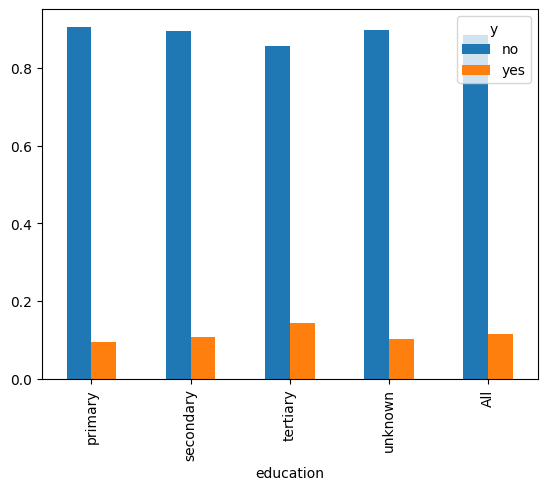

In [33]:
t_.plot.bar()

<Axes: xlabel='education'>

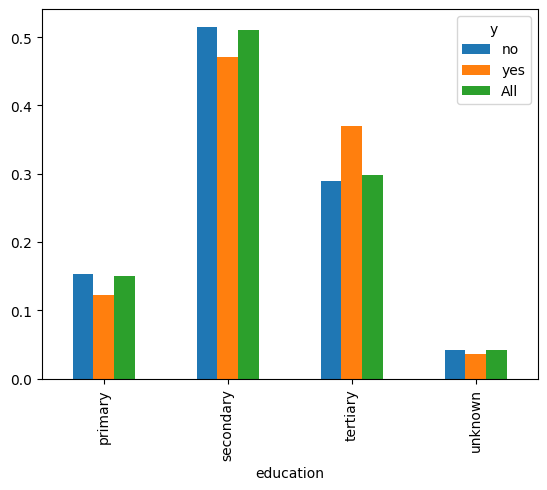

In [34]:
ta_ = pd.crosstab(df.education, df.y, margins=True, normalize = 'columns')
ta_.plot.bar()

In [35]:
df.groupby("y").mean()

C:\Users\dsti0\AppData\Local\Temp\ipykernel_17220\2294615298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("y").mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [36]:
balanceGroup = [df.balance[df.y == s] for s in list(df.y.unique())]
balanceGroup[1]

13       502
30      4189
33      2536
34      1235
36       229
        ... 
4494     668
4503     362
4504    1080
4505     620
4511     668
Name: balance, Length: 521, dtype: int64

array([[<Axes: title={'center': 'primary'}>,
        <Axes: title={'center': 'secondary'}>],
       [<Axes: title={'center': 'tertiary'}>,
        <Axes: title={'center': 'unknown'}>]], dtype=object)

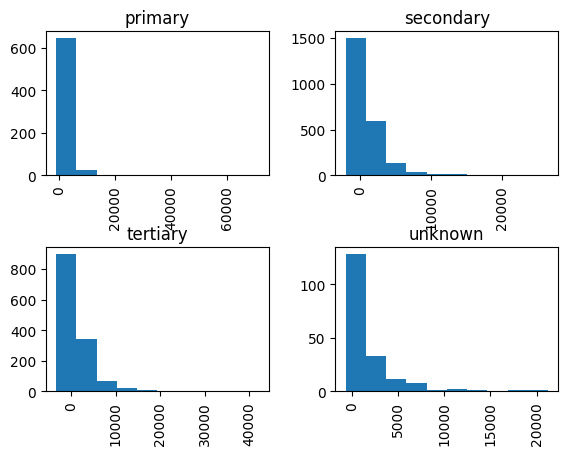

In [37]:
df.hist(column = "balance", by = "education")

In [38]:
df.balance.describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [39]:
df.education.describe()

count          4521
unique            4
top       secondary
freq           2306
Name: education, dtype: object

<Axes: >

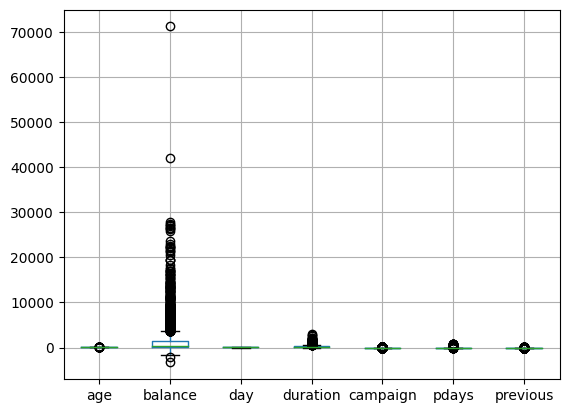

In [40]:
df.boxplot()

<Axes: >

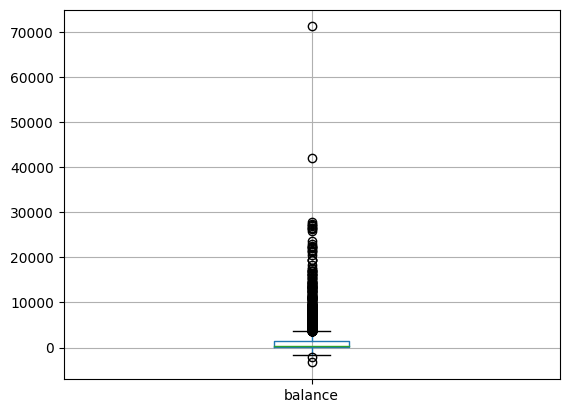

In [41]:
df.boxplot(column=['balance'])

In [42]:
df[df.balance > 40000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


Example method for supressing outliers
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quartile)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

In [43]:
Q1 = df.quantile(0.25)
Q1

C:\Users\dsti0\AppData\Local\Temp\ipykernel_17220\3817245539.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)


age          33.0
balance      69.0
day           9.0
duration    104.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

In [44]:
Q3 = df.quantile(0.75)

C:\Users\dsti0\AppData\Local\Temp\ipykernel_17220\2293356458.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [45]:
IQR = Q3 - Q1
print(IQR)

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [46]:
df_ = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape, df_.shape)

(4521, 17) (2803, 17)


C:\Users\dsti0\AppData\Local\Temp\ipykernel_17220\3507158436.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_ = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Exercise : 
 - explore how the different variables are related 
 - which problems must be solved before further analysis
 - design a fine-grained function to supress outliers

In [47]:
df.values

array([[30, 'unemployed', 'married', ..., 0, 'unknown', 'no'],
       [33, 'services', 'married', ..., 4, 'failure', 'no'],
       [35, 'management', 'single', ..., 1, 'failure', 'no'],
       ...,
       [57, 'technician', 'married', ..., 0, 'unknown', 'no'],
       [28, 'blue-collar', 'married', ..., 3, 'other', 'no'],
       [44, 'entrepreneur', 'single', ..., 7, 'other', 'no']],
      dtype=object)

In [48]:
Xdf = df.drop('y', axis = 1)
Xdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [49]:
objlist = Xdf.select_dtypes(['object']).columns.tolist()
objlist

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [50]:
dum = pd.get_dummies(Xdf[objlist])
dum.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [51]:
numlist = Xdf.select_dtypes(exclude=['object']).columns.tolist()


In [52]:
X = pd.concat([dum, Xdf[numlist]], axis =1).values
print('types in X', X.dtype)
X

types in X int64


array([[  0,   0,   0, ...,   1,  -1,   0],
       [  0,   0,   0, ...,   1, 339,   4],
       [  0,   0,   0, ...,   1, 330,   1],
       ...,
       [  0,   0,   0, ...,  11,  -1,   0],
       [  0,   1,   0, ...,   4, 211,   3],
       [  0,   0,   1, ...,   2, 249,   7]], dtype=int64)

In [53]:
y = df['y'].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test[:2, :])
y_pred = clf.predict(X_test)
print(y_pred.dtype)
print(y_test.dtype)

object
object


C:\Anaconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
score = clf.score(X_test, y_test)
print(score)

0.8947721179624665


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*We call Positive the labels of the majority class, Negatives the labels of the minority class*

<img src="cm.png" style="width:500px;height:300;">

In [58]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')


[[1294   40]
 [ 117   41]]



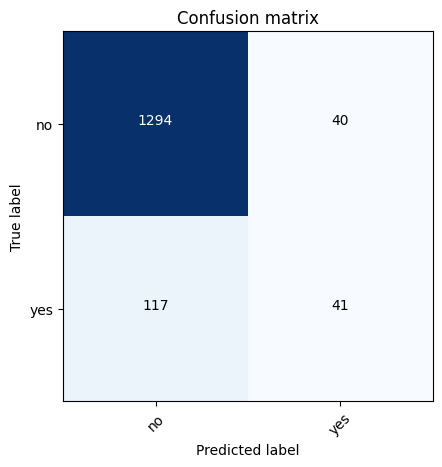

In [59]:
fig, ax = plt.subplots()
plot_confusion_matrix(cm, classes=np.unique(y), ax = ax)